###  Bayesian Linear Regression

Download the Seoul Bike Sharing Demand dataset from here.

You are required to use Bayesian Linear Regression (BLR) where the variable to be
predicted is the number of bikes rented. Although the posterior distributions
produced by BLR could be used to make predictions, you are not required to
do that for this coursework; instead you are asked to produce these posterior
distributions and analyse them.

The first line of the downloaded data gives the names of the columns.
Two of these names are temperatures which contain the ° symbol. This
symbol may cause you problems when reading in the data, so just edit the
file to delete it.

In [ ]:
#### Task 10

It is clearly not possible to do linear regression without altering the
downloaded data in some way (for example, a number of variables are
not numeric). Bearing in mind that the goal is to predict number of
bikes rented, create a new dataset from the original downloaded dataset
that is suitable for Bayesian Linear Regression (BLR). In your report,
describe and justify how you have transformed the data.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'seoul+bike+sharing+demand/SeoulBikeData.csv'
bike_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
pd.set_option('display.max_columns', None)



# Correcting the date format issue
bike_data['Date'] = pd.to_datetime(bike_data['Date'], dayfirst=True)
bike_data['DayOfWeek'] = bike_data['Date'].dt.dayofweek
bike_data['Month'] = bike_data['Date'].dt.month



# Displaying the DataFrame to confirm the changes
print(bike_data[['Date', 'DayOfWeek', 'Month']].head())

# Columns to be one-hot encoded
categorical_features = ['Seasons', 'Holiday', 'Functioning Day', 'DayOfWeek', 'Month']

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit the encoder to the categorical data
one_hot_encoder.fit(bike_data[categorical_features])

# Transform the data
encoded_data = one_hot_encoder.transform(bike_data[categorical_features]).toarray()

# Get the feature names using the correct method
feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_features)



# Columns to be standardized
numerical_features = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 
                      'Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)',
                      'Rainfall(mm)', 'Snowfall (cm)', 'Hour']
standard_scaler = StandardScaler()

# Creating a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', standard_scaler, numerical_features),
        ('cat', one_hot_encoder, categorical_features)
    ])

# Applying transformations
bike_data_transformed = preprocessor.fit_transform(bike_data)

# Getting the feature names after one-hot encoding
ohe_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_features)
feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Creating the transformed DataFrame
bike_data_transformed_df = pd.DataFrame(bike_data_transformed, columns=feature_names)

# Adding the target variable back
bike_data_transformed_df['Rented Bike Count'] = bike_data['Rented Bike Count']

# Displaying the transformed DataFrame
bike_data_transformed_df.head()

        Date  DayOfWeek  Month
0 2017-12-01          4     12
1 2017-12-01          4     12
2 2017-12-01          4     12
3 2017-12-01          4     12
4 2017-12-01          4     12


,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Rented Bike Count
0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-1.661325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,254
1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-1.516862,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,204
2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,-1.372399,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,173
3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-1.227936,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,107
4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,-1.083473,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78


In [5]:
import pymc as pm
import numpy as np
import arviz as az
# Assuming X_train, y_train are your training data prepared as shown earlier

from sklearn.model_selection import train_test_split

# Features and target variable
X = bike_data_transformed_df.drop('Rented Bike Count', axis=1)
y = bike_data_transformed_df['Rented Bike Count']

# Converting to numpy arrays
X_np = X.to_numpy()
y_np = y.to_numpy()

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Displaying the shapes of the arrays to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape



'''
num_samples = 1000
model = pm.Model()

with model:
    # Defining our priors
    w0 = pm.Normal('w0', mu=0, sigma=20)
    w1 = pm.Normal('w1', mu=0, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*x # auxiliary variables

    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=y)
    
    # inference
    sampler = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler 
    # or alternatively
    # sampler = pm.Metropolis()
    
    idata = pm.sample(num_samples, step=sampler, progressbar=True, cores=2, chains=2)
'''


num_samples = 1000
model = pm.Model()

with model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_train.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome (Linear model)
    mu = alpha + pm.math.dot(X_train, beta)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y_train)

    # Posterior sampling
    trace = pm.sample(num_samples, return_inferencedata=False)

    # Convert MultiTrace to InferenceData
    inference_data = pm.to_inference_data(trace)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 166 seconds.


             mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha     142.299  8.023  126.863  156.774      0.143    0.101    3175.0   
beta[0]   214.156  6.640  201.610  226.440      0.131    0.092    2587.0   
beta[1]  -172.134  4.222 -179.594 -163.811      0.082    0.058    2661.0   
beta[2]    16.615  2.390   12.149   21.135      0.038    0.027    3847.0   
beta[3]    32.136  2.746   27.099   37.543      0.044    0.031    3861.0   
beta[4]   114.185  7.270  100.385  127.533      0.147    0.104    2444.0   
beta[5]   -52.898  2.789  -58.299  -48.055      0.044    0.031    3968.0   
beta[6]   -68.455  2.290  -72.546  -64.159      0.033    0.024    4729.0   
beta[7]     8.177  2.125    4.259   12.177      0.030    0.022    5032.0   
beta[8]   191.401  2.248  187.227  195.684      0.034    0.024    4488.0   
beta[9]   123.780  6.887  110.227  135.821      0.131    0.093    2757.0   
beta[10]   57.182  7.103   44.445   70.763      0.137    0.097    2676.0   
beta[11]   3

ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not MultiTrace

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

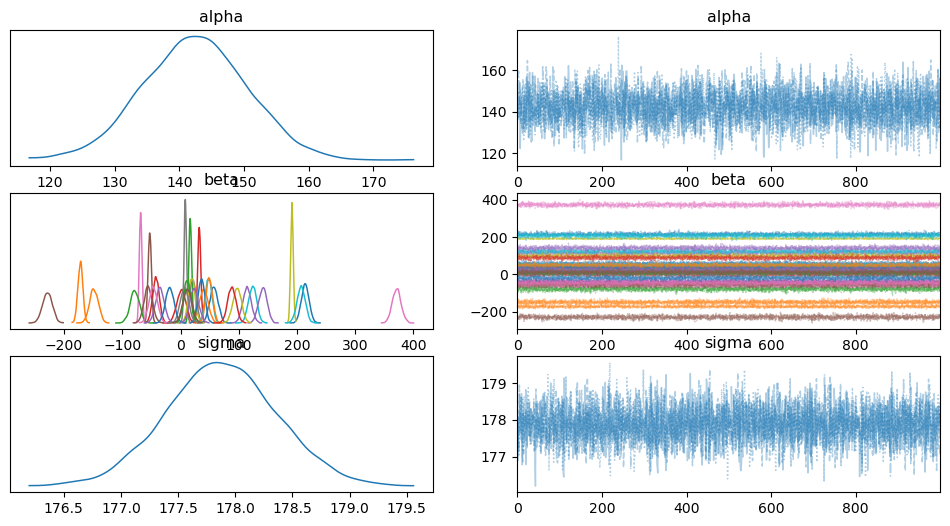

In [8]:
az.plot_trace(inference_data, combined=True)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

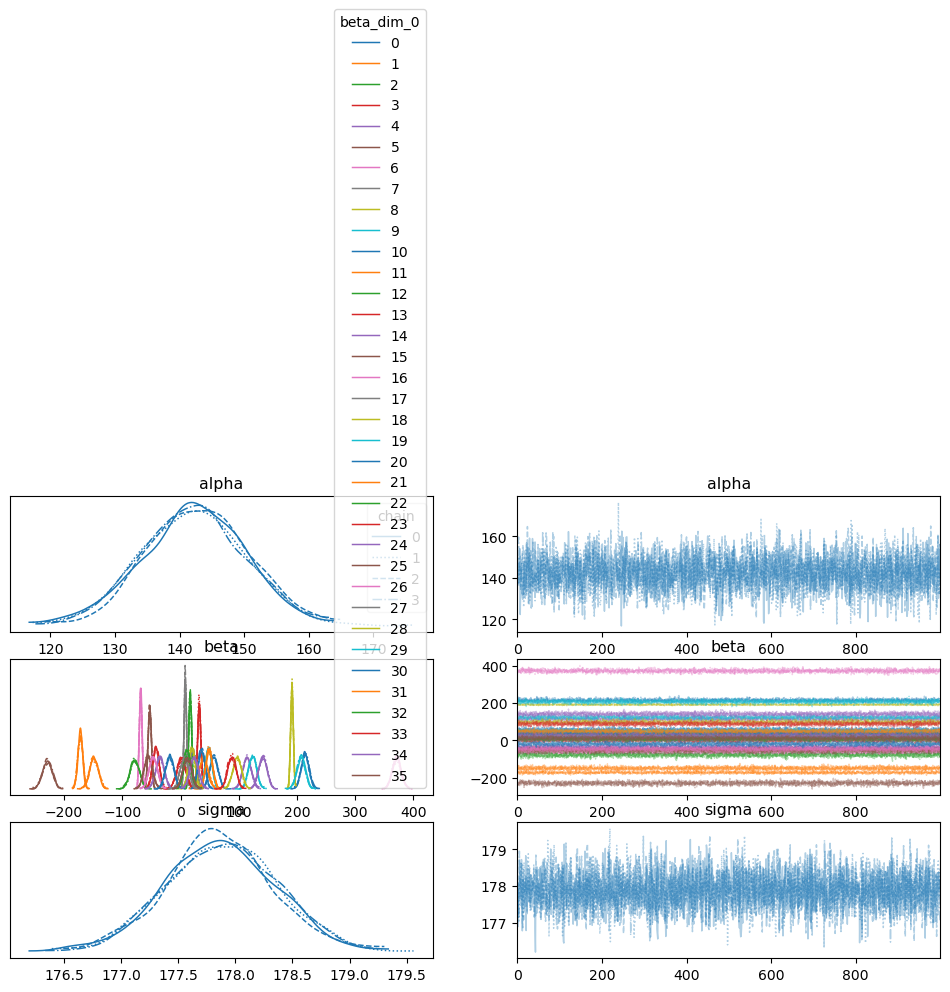

In [9]:
az.plot_trace(inference_data, legend=True)

In [7]:
az.summary(inference_data, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,142.30,8.02,126.86,156.77,0.14,0.10,3174.57,2567.45,1.0
beta[0],214.16,6.64,201.61,226.44,0.13,0.09,2587.03,2410.78,1.0
beta[1],-172.13,4.22,-179.59,-163.81,0.08,0.06,2661.24,3008.34,1.0
beta[2],16.61,2.39,12.15,21.14,0.04,0.03,3846.93,2812.08,1.0
beta[3],32.14,2.75,27.10,37.54,0.04,0.03,3861.30,2967.64,1.0
beta[4],114.19,7.27,100.38,127.53,0.15,0.10,2443.78,2670.71,1.0
beta[5],-52.90,2.79,-58.30,-48.06,0.04,0.03,3967.66,2959.53,1.0
beta[6],-68.45,2.29,-72.55,-64.16,0.03,0.02,4729.12,2506.71,1.0
beta[7],8.18,2.12,4.26,12.18,0.03,0.02,5032.06,2770.54,1.0
beta[8],191.40,2.25,187.23,195.68,0.03,0.02,4488.15,3146.54,1.0


In [ ]:
with model:
    # Use return_inferencedata=True to get InferenceData directly
    trace = pm.sample(1000, return_inferencedata=True)
# Convert MultiTrace to InferenceData
inference_data = pm.to_inference_data(trace)

# Summary of the trace
summary = pm.summary(inference_data)
print(summary)
